In [13]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score

# Data Collection and Analysis

In [14]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.shape

(200, 5)

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# Extracting Relevant Features

In [19]:
X = df.iloc[:, [3, 4]].values

# used to specify the columns you want by splicing the data. in this case it splices of index 3 (Annual Income (k$)) and index 4 (Annual Income (k$)) which are what we need

In [20]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Choosing Optimum Number of Clusters

now we need to figure out the optimum number of clusters for the dataset. The number of clusters we can use varies depending on the dataset.

we'll choose the correct number of clusters by using a parameter called WCSS

WCSS --> Within Clusters Sum of Squares

Basically when it groups data points it creates centroids which serve as the center for each cluster (so 3 clusters means 3 centroids). so it then measures the distance between each data point and the centroids.

I'm assuming that's what determines which cluster that data point will belong to.

It's very important to have good partitioned clusters. meaning, each data points should be as close as possible to a particluar data point so that the clusters are easily distinguishable

We're going to find the minimum WCSS value using the 'elbow method'

In [21]:
# Finding the WCSS value for different number of clusters

WCSS =[]

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_) # this will give us the WCSS value the '.inertia_' method lies in the KMeans algorithm



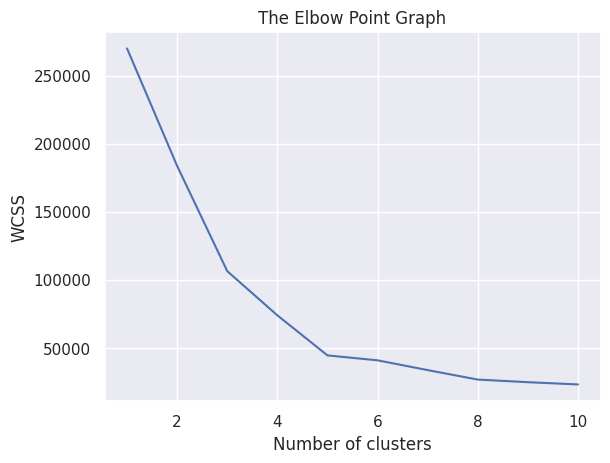

In [22]:
# plot an elbow graph

sns.set()
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow point graph can also be called 'Cut-off Point Graph'.

There are 2 cut-off points on the graph, at point 3 and point 5 (number of clusters).

So notice that after the drop at point 5 there was no other sharp significant drop. so we'll use 5 as the optimum number of clusters

# Training the K-Means Clustering Model

this is a very good example of an unsupervised learning model

In [23]:
# k = 5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42) # returns a label for each data point based on their cluster
y = kmeans.fit_predict(X)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Visualizing all the Clusters

plotting the clusters and their data points

5 Clusters - 0, 1, 2, 3, 4, 5

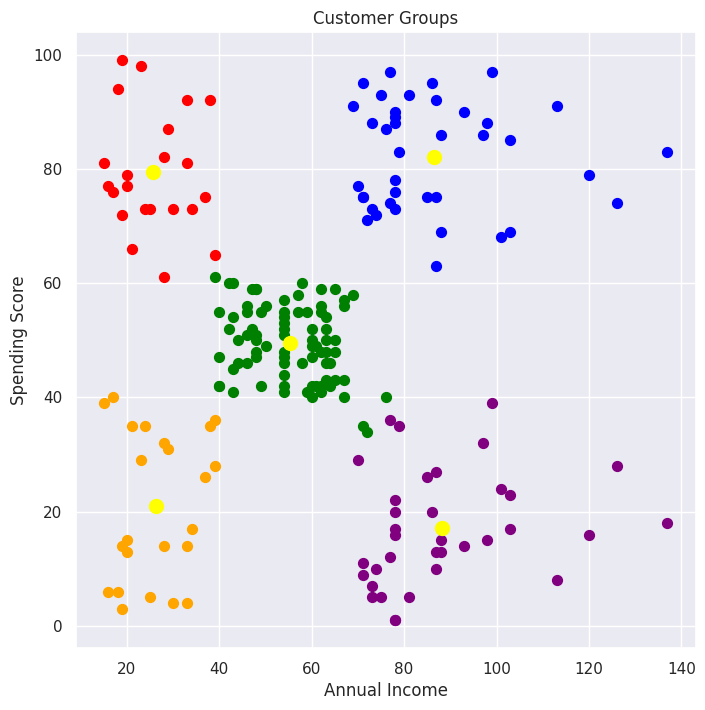

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='orange', label='Cluster 5')

# using this as an example - plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1'):
# the X[y==0,0] part represents x-axis while X[y==0,1] represents y-axis
# the last 0 in X[y==0,0] represents the annual income (since it's on the 0th index in the array), while the last 1 in X[y==0,1] represents spending score (since it's on the 1st index in the array)
# the first 0 in X[y==0,0] and X[y==0,1] represents the cluster (in this case, cluster 1 but since puthon starts counting at 0, that's why we have 0 there instead of 1)

# figsize=(8,8) is the size of the plotted graph (8 inches by 8 inches), s=50 is the size of each point, c='green' for color, label for the cluster labels.



# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()